In [1]:
import pandas as pd
import numpy as np
from regression import create_regression_data_OLS, fit_OLS_model
from plots import plot_reg_lines

In [2]:
raw_df = pd.read_excel("../data/all_combo.xlsx")
raw_df


,Unnamed: 0,year,country_id_o,country_id_d,gdp_o,gdp_d,dist,tradeflow_baci
0,1921773,2015,IND,AUS,2.111751e+09,1.345383e+09,10418,3.504253e+06
1,1921774,2016,IND,AUS,2.263522e+09,1.204616e+09,10418,3.226903e+06
2,1921775,2017,IND,AUS,2.651473e+09,1.326883e+09,10418,3.963988e+06
3,1921776,2018,IND,AUS,2.702930e+09,1.428530e+09,10418,4.042066e+06
4,1921777,2019,IND,AUS,2.831552e+09,1.391953e+09,10418,3.210580e+06
...,...,...,...,...,...,...,...,...
2180,4511478,2016,VNM.2,USA,2.026159e+08,1.856910e+10,14306,4.015331e+07
2181,4511479,2017,VNM.2,USA,2.813534e+08,1.947962e+10,14306,4.528272e+07
2182,4511480,2018,VNM.2,USA,3.087021e+08,2.052716e+10,14306,4.795542e+07
2183,4511481,2019,VNM.2,USA,3.303913e+08,2.137257e+10,14306,6.355336e+07


In [3]:
raw_df.columns

Index(['Unnamed: 0', 'year', 'country_id_o', 'country_id_d', 'gdp_o', 'gdp_d',
       'dist', 'tradeflow_baci'],
      dtype='object')

In [4]:
ln_df = np.log(raw_df[['gdp_o', 'gdp_d', 'dist','tradeflow_baci']])
ln_df.dropna()

,gdp_o,gdp_d,dist,tradeflow_baci
0,21.470783,21.019945,9.251290,15.069488
1,21.540188,20.909427,9.251290,14.987033
2,21.698381,21.006098,9.251290,15.192761
3,21.717602,21.079911,9.251290,15.212266
4,21.764091,21.053973,9.251290,14.981962
...,...,...,...,...
2180,19.126823,23.644765,9.568434,17.508215
2181,19.455122,23.692635,9.568434,17.628436
2182,19.547887,23.745015,9.568434,17.685782
2183,19.615788,23.785374,9.568434,17.967390


In [5]:
X, y = create_regression_data_OLS(ln_df, [
        'gdp_o', 'gdp_d', 'dist'
        ], "tradeflow_baci")
X

,const,gdp_o,gdp_d,dist
0,1.0,21.470783,21.019945,9.251290
1,1.0,21.540188,20.909427,9.251290
2,1.0,21.698381,21.006098,9.251290
3,1.0,21.717602,21.079911,9.251290
4,1.0,21.764091,21.053973,9.251290
...,...,...,...,...
2180,1.0,19.126823,23.644765,9.568434
2181,1.0,19.455122,23.692635,9.568434
2182,1.0,19.547887,23.745015,9.568434
2183,1.0,19.615788,23.785374,9.568434


In [6]:
y

0       15.069488
1       14.987033
2       15.192761
3       15.212266
4       14.981962
          ...    
2180    17.508215
2181    17.628436
2182    17.685782
2183    17.967390
2184    18.166061
Name: tradeflow_baci, Length: 2185, dtype: float64

In [7]:
gravity_model = fit_OLS_model(X, y)

In [8]:
gravity_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         tradeflow_baci   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     2017.
Date:                Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:06:23   Log-Likelihood:                -3948.4
No. Observations:                2185   AIC:                             7905.
Df Residuals:                    2181   BIC:                             7927.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.5887      0.606    -24.062      0.000     -15.778     -13.400
gdp_o          0.9824      0.018     53.222      0.000       0.946       1.019
gdp_d          0.9834      0.018     53.238      0.000       0.947       1.020
dist          -1.2757      0.037    -34.763      0.000      -1.348      -1.204
==============================================================================
Omnibus:                     1002.031   Durbin-Watson:                   0.408
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8610.945
Skew:                          -1.959   Prob(JB):                         0.00
Kurtosis:                      11.901   Cond. No.                         581.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

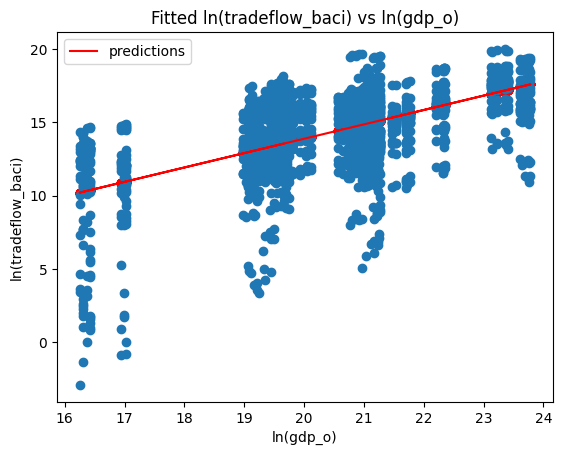

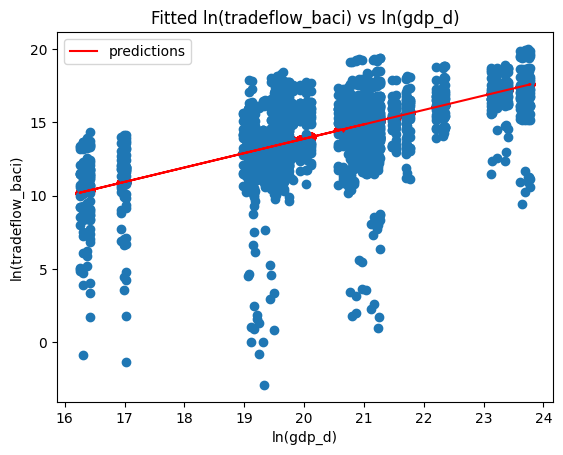

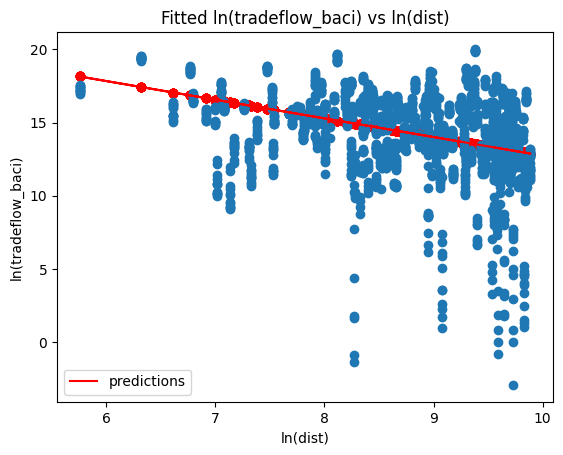

In [9]:
plot_reg_lines(ln_df, gravity_model, [
        'gdp_o', 'gdp_d', 'dist',
    ], "tradeflow_baci")